# Import Dependencies

We begin by importing the necessary libraries.

In [48]:
# Data analysis
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Repeat setup

Repeat the setup procedure from the previous notebooks.

In [24]:
# Read data
df = pd.read_csv('../data/flights_df.csv')
# Drop irrelevant columns
df.drop(columns=['Unnamed: 0'], inplace=True)
# Drop rows with missing values
df.dropna(inplace=True)
# Print first 5 rows
df.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00


In [25]:
# Create df with flights from LGA
lag_df = df[df['origin'] == 'LGA'].copy()
# Display first 5 rows
lag_df.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00
7,2013,1,1,557.0,600,-3.0,709.0,723,-14.0,EV,5708,N829AS,LGA,IAD,53.0,229,6,0,2013-01-01 06:00:00
9,2013,1,1,558.0,600,-2.0,753.0,745,8.0,AA,301,N3ALAA,LGA,ORD,138.0,733,6,0,2013-01-01 06:00:00
14,2013,1,1,559.0,600,-1.0,941.0,910,31.0,AA,707,N3DUAA,LGA,DFW,257.0,1389,6,0,2013-01-01 06:00:00


In [26]:
# Create df with flights from LGA to ATL
lag_to_atlanta_df = lag_df[lag_df['dest'] == 'ATL'].copy()
# Display first 5 rows
lag_to_atlanta_df.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00
18,2013,1,1,600.0,600,0.0,837.0,825,12.0,MQ,4650,N542MQ,LGA,ATL,134.0,762,6,0,2013-01-01 06:00:00
62,2013,1,1,658.0,700,-2.0,944.0,939,5.0,DL,1547,N6703D,LGA,ATL,126.0,762,7,0,2013-01-01 07:00:00
101,2013,1,1,754.0,759,-5.0,1039.0,1041,-2.0,DL,2047,N935DL,LGA,ATL,126.0,762,7,59,2013-01-01 07:00:00
123,2013,1,1,814.0,810,4.0,1047.0,1030,17.0,FL,346,N977AT,LGA,ATL,132.0,762,8,10,2013-01-01 08:00:00


## Question 3

Continuing with `lag_to_atlanta_df`,

### Part a: Produce a histogram for `air_time`.

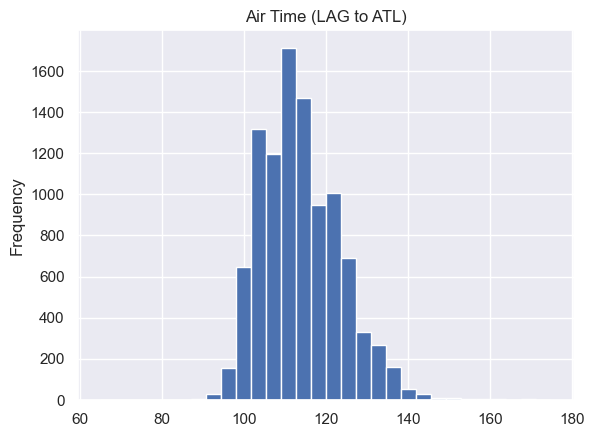

In [27]:
# Make histogram
lag_to_atlanta_df['air_time'].plot(kind='hist', bins=30)
# Set title
plt.title('Air Time (LAG to ATL)')
# Show plot
plt.show()

### Part b: 
Reseed the random number as above. Pick two of the three airlines DL, FL, and MQ; denote them by A and B. Take a random sample of 100 flights for A, and let $\hat{p}_\text{A}$ be the proportion of late flights (in the sample). Compute $\hat{p}_\text{B}$ in a similar way. Label the airlines so that $\hat{p}_\text{A} > \hat{p}_\text{B}$. Produce a confidence interval for $p_\text{A} - p_\text{B}$.

In [52]:
# Recall the mapping function used in the previous notebook
def map_status(delay):
    if delay < 0:
        return 'early'
    elif delay > 15:
        return 'late'
    else:
        return 'on_time'
lag_to_atlanta_df['status'] = lag_to_atlanta_df['dep_delay'].apply(map_status)
# Take a random sample of n=100 for each airline
lag_to_atlanta_sample_1 = lag_to_atlanta_df[lag_to_atlanta_df['carrier'] == 'FL'].sample(n=100, random_state=21323).reset_index(drop=True)
lag_to_atlanta_sample_2 = lag_to_atlanta_df[lag_to_atlanta_df['carrier'] == 'MQ'].sample(n=100, random_state=21323).reset_index(drop=True)
# Compute the ratio of late flights
late_ratio_1 = len(lag_to_atlanta_sample_1[lag_to_atlanta_sample_1['status'] == 'late']) / 100
late_ratio_2 = len(lag_to_atlanta_sample_2[lag_to_atlanta_sample_2['status'] == 'late']) / 100
# Print ratios
late_ratio_1, late_ratio_2

(0.24, 0.17)

Since we want $\hat{p}_\text{A}$, let airline A be FL, and airline B be MQ. Before computing the confidence interval though, we first verify that both samples are sufficiently large, according to 

\begin{equation}
n>9\times\frac{\max(p,\;1-p)}{\min(p,\;1-p)}
\end{equation}

where $p$ is the sample proportion.

In [53]:
# Check sample size requirements
min_size_1 = 9 * max(late_ratio_1, 1 - late_ratio_1) / min(late_ratio_1, 1 - late_ratio_1)
min_size_2 = 9 * max(late_ratio_2, 1 - late_ratio_2) / min(late_ratio_2, 1 - late_ratio_2)
# Print results
min_size_1, min_size_2

(28.5, 43.94117647058823)

Since both are below 100, we can proceed accordingly with computing the confidence interval for $p_\text{A} - p_\text{B}$. 

In [54]:
# Compute CI for difference between two population proportions
def two_prop_conf_int(prop_1, prop_2, n_1=100, n_2=100):
    estimator = prop_1 - prop_2
    std_error = 2 * np.sqrt(prop_1 * (1 - prop_1) / n_1 + prop_2 * (1 - prop_2) / n_2)
    return estimator - std_error, estimator + std_error
# Print CI
two_prop_conf_int(late_ratio_1, late_ratio_2)

(-0.04375412080447902, 0.18375412080447898)

As we can see, we are 95% confident that the difference between the two population proportions is between -0.044 and 0.184. Note, since the interval includes 0, we do not have sufficient evidence to reject the null, i.e. that there is no difference between $p_\text{A}$ and $p_\text{B}$.